In [6]:
import numpy as np 
import matplotlib.pyplot as plt
import network

[[[ 0.62399885]
  [ 0.52347336]]

 [[-0.47368778]
  [ 0.16644142]]

 [[-0.19736195]
  [-0.5140043 ]]

 [[-0.77030708]
  [-0.09747016]]

 [[ 0.69497782]
  [ 0.74810313]]

 [[ 0.43395247]
  [ 0.03476778]]

 [[ 0.71387222]
  [ 0.40445092]]

 [[ 0.52575911]
  [-0.9412059 ]]

 [[ 0.90204341]
  [ 0.13011185]]

 [[-0.1470261 ]
  [-0.158627  ]]] [1. 0. 1. 1. 1. 1. 1. 0. 1. 1.]


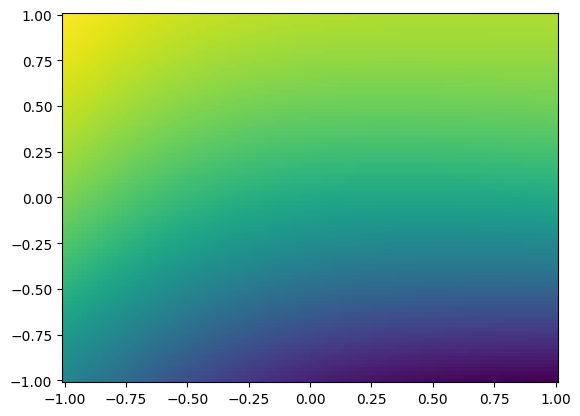

In [44]:
net = network.Network([2, 4, 1])

# training data
x_train = np.random.uniform(-1, 1, [2, 100])
y_train = 0.5*np.sign(x_train[0]*x_train[1]) + 0.5


# test data
x_test = np.random.uniform(-1, 1, [2, 80])
y_test = 0.5*np.sign(x_test[0]*x_test[1]) + 0.5


print((x_train.T).reshape(len(x_train[0]), 2, 1)[:10], y_train[:10])

test_data = list(zip((x_test).reshape(len(x_test[0]), 2, 1), y_test.reshape(len(x_test[0]), 1, 1)))
train_data = list(zip((x_train.T).reshape(len(x_train[0]), 2, 1), y_train.reshape(len(x_train[0]), 1, 1)))

XX, YY = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))

ZZ = net.feedforward((XX.flatten(), YY.flatten()))

plt.pcolormesh(XX, YY, ZZ.reshape(XX.shape))



In [29]:
n = 100;
x = 2*np.random.random(n)-1
y = 2*np.random.random(n)-1
training = [];
for i in range(0,n):
    training.append((np.array([[x[i]],[y[i]]]),np.array([[1/2+np.sign(x[i]*y[i])/2]])));

In [45]:
print(train_data[:5])
print(training[:5])

[(array([[0.62399885],
       [0.52347336]]), array([[1.]])), (array([[-0.47368778],
       [ 0.16644142]]), array([[0.]])), (array([[-0.19736195],
       [-0.5140043 ]]), array([[1.]])), (array([[-0.77030708],
       [-0.09747016]]), array([[1.]])), (array([[0.69497782],
       [0.74810313]]), array([[1.]]))]
[(array([[-0.99762366],
       [-0.91144453]]), array([[1.]])), (array([[-0.34899971],
       [ 0.26906965]]), array([[0.]])), (array([[-0.15200235],
       [ 0.67312273]]), array([[0.]])), (array([[0.92606272],
       [0.61704989]]), array([[1.]])), (array([[-0.95285371],
       [ 0.97052238]]), array([[0.]]))]


In [46]:
%%capture
net.SGD(train_data, 1000, 25, 3.0)

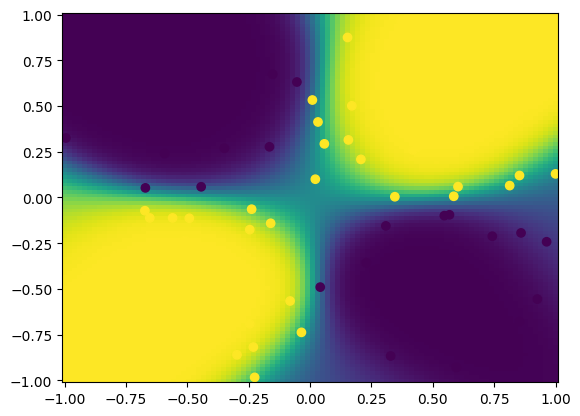

In [47]:
nbins=100
xi, yi = np.mgrid[-1:1:nbins*1j, -1:1:nbins*1j]
zi = net.feedforward(np.vstack([xi.flatten(), yi.flatten()]))

plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto')
plt.scatter(x,y,c=np.sign(x*y))
plt.show()